In [16]:
import networkx as nx

def load_graph(graph_file: str) -> nx.MultiDiGraph:
    """
    Load a graph from a GraphML file.
    """
    try:
        graph = nx.read_graphml(graph_file)
        print(f"Graph loaded from {graph_file} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
        return graph
    except Exception as e:
        print(f"Error loading graph: {e}")
        exit(1)

def compute_distance(graph: nx.MultiDiGraph, source: str, target: str) -> int:
    """
    Compute the shortest path length (number of edges/ hops) from source to target.
    Returns the distance if a path exists, and raises an exception if not.
    """
    try:
        # For a MultiDiGraph, nx.shortest_path_length works fine (it counts edges)
        distance = nx.shortest_path_length(graph, source=source, target=target)
        return distance
    except nx.NetworkXNoPath:
        raise ValueError(f"No path exists between '{source}' and '{target}'")
    except nx.NodeNotFound as e:
        raise ValueError(e)

def main():
    # Assumes the graph is saved as 'kg.graphml' in the current directory.
    graph_file = "kg.graphml"
    graph = load_graph(graph_file)

    print("\nEnter the name of the source node and target node to calculate the distance.")
    source = "earth"
    target = "dew"

    try:
        distance = compute_distance(graph, source, target)
        print(f"\nThe shortest distance from '{source}' to '{target}' is {distance} edge(s).")
    except ValueError as ve:
        print(f"\nError: {ve}")


In [17]:
if __name__ == "__main__":
    main()

Graph loaded from kg.graphml with 242 nodes and 396 edges.

Enter the name of the source node and target node to calculate the distance.

The shortest distance from 'earth' to 'dew' is 2 edge(s).


In [7]:
import networkx as nx

# Convert to an undirected graph to ensure connectivity issues are avoided.
graph = nx.read_graphml("kg.graphml")
undirected_graph = graph.to_undirected()

best_pair = None
max_distance = -1

# Process component-by-component
for component in nx.connected_components(undirected_graph):
    subgraph = undirected_graph.subgraph(component)
    
    # Use all_pairs_shortest_path_length on the component.
    for source, lengths in nx.all_pairs_shortest_path_length(subgraph):
        for target, distance in lengths.items():
            if distance > max_distance:
                max_distance = distance
                best_pair = (source, target)
                
print(f"\nBest pair: {best_pair} \nMax distance: {max_distance}")



Best pair: ('mudspire', 'glass') 
Max distance: 8


In [19]:
# Filter out nodes that have "_and_" in their name
filtered_elements = [node for node in graph.nodes() if "_and_" not in node]

print("List of created elements (ignoring composite elements):")
for element in filtered_elements:
    print(" -", element)
print(f"\nTotal elements created: {len(filtered_elements)}")


List of created elements (ignoring composite elements):
 - water
 - earth
 - fire
 - air
 - mud
 - clay
 - petrified soil
 - ceramic
 - earthenware
 - steam
 - mist
 - blaze
 - ember
 - dew
 - fog
 - condensation
 - humidity
 - cloud
 - vapory
 - nimbus
 - cirrus
 - lava
 - magma
 - glowing ember
 - dust
 - loam
 - gossamer
 - fertile mist
 - silken soil
 - energy
 - obsidian
 - ignispectra
 - blazeflame
 - voltwing
 - vaporveil
 - dewdrop
 - vapor
 - porcelain
 - ceramics
 - scorchwind
 - zephyrflare
 - blazestorm
 - sediment
 - pure water
 - stone
 - brick
 - silt
 - mineral
 - fired brick
 - glazed ceramic
 - soil
 - fertile soil
 - storm
 - drizzle
 - lightning
 - thunderstorm
 - 1. water
 - 2. water
 - 3. earth
 - 4. mud
 - sludge
 - 5. mud
 - 6. mud
 - 7. mist
 - 8. mist
 - 9. mist
 - pottery
 - glaze
 - terraquint
 - clayveil
 - geonexus
 - fired clay
 - terracotta
 - fired earthenware
 - charred earth
 - burnt clay
 - quagmire essence
 - marshland spirit
 - swamp vapor
 - mudfi

In [20]:
import pandas as pd
import random
import seaborn as sns

def colors2Community(communities) -> pd.DataFrame:
    ## Define a color palette
    p = sns.color_palette('hls', len(communities)).as_hex()
    random.shuffle(p)
    rows = []
    group = 0
    for community in communities:
        color = p.pop()
        group += 1
        for node in community:
            rows += [{"node": node, "color": color, "group": group}]
    df_colors = pd.DataFrame(rows)
    return df_colors

In [29]:
communities_generator = nx.community.girvan_newman(graph)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))
print("Number of Communities = ", len(communities))
print(communities)
df_colors = colors2Community(communities)

for index, row in df_colors.iterrows():
    graph.nodes[row['node']]['group'] = row['group']
    graph.nodes[row['node']]['color'] = row['color']
    graph.nodes[row['node']]['size'] = graph.degree[row['node']]

Number of Communities =  3
[['1. water', '1. water_and_earth', '2. water', '2. water_and_air', '3. earth', '3. earth_and_air', '4. mud', '4. mud_and_water', '6. mud', '6. mud_and_air', '7. mist', '7. mist_and_water', '8. mist', '8. mist_and_earth', '9. mist', '9. mist_and_air', 'air', 'air_and_earth', 'air_and_water', 'basalt', 'basalt_and_fire', 'blackened stone', 'blaze', 'blazeflame', 'blazestorm', 'burnt clay', 'ceramic', 'ceramic composite', 'ceramic composite_and_fire', 'ceramic_and_fire', 'ceramic_and_mud_and_earth', 'ceramic_and_water', 'charred earth', 'cirrus', 'claystorm', 'claystorm_and_air', 'claystorm_and_mud_and_earth', 'clayveil', 'cloud', 'cloud_and_air', 'cloud_and_water', 'condensation', 'dew', 'dew_and_air', 'dew_and_water', 'dewdrop', 'drizzle', 'dust', 'dust_and_air', 'dust_and_earth', 'dust_and_mud', 'dusty breeze', 'dusty breeze_and_air', 'dusty breeze_and_mud_and_earth', 'earth', 'earth_and_air', 'earth_and_earth', 'earth_and_fire', 'earth_and_water', 'earthenw

In [ ]:
from pyvis.network import Network

net = Network(notebook=True, height="800px", width="100%")
net.from_nx(graph) 
net.show_buttons(filter_=['physics'])
net.show("kg_visualization_50iter.html")

kg_visualization_8iter.html


In [ ]:
import json 

with open('elements.JSON', "r") as f:
        combo_dict = json.load(f)

# Store key as frozenset for order-independence, and value as a list (for uniformity)
normalized = {}
for k, v in combo_dict.items():
    key_items = tuple(sorted([item.strip() for item in k.split(',')]))
    if isinstance(v, list):
        results = [str(result) for result in v]
    else:
        results = [str(v)]
    normalized[key_items] = results

normalized

{('rain', 'smoke'): ['acid rain'],
 ('rain', 'smog'): ['acid rain'],
 ('bird', 'metal'): ['airplane'],
 ('bird', 'steel'): ['airplane'],
 ('clock', 'sound'): ['alarm clock'],
 ('fruit', 'time'): ['alcohol'],
 ('juice', 'time'): ['alcohol'],
 ('plant', 'water'): ['algae'],
 ('ocean', 'plant'): ['algae', 'seaweed'],
 ('plant', 'sea'): ['algae', 'seaweed'],
 ('life', 'space'): ['alien'],
 ('dust', 'human'): ['allergy'],
 ('lizard', 'swamp'): ['alligator'],
 ('lizard', 'river'): ['alligator'],
 ('mountain', 'sheep'): ['alpaca'],
 ('car', 'hospital'): ['ambulance'],
 ('car', 'doctor'): ['ambulance'],
 ('bird', 'human'): ['angel'],
 ('fishing rod', 'human'): ['angler'],
 ('grass', 'wild animal'): ['ant'],
 ('sugar', 'wild animal'): ['ant'],
 ('desert', 'snow'): ['antarctica'],
 ('desert', 'ice'): ['antarctica'],
 ('glass', 'water'): ['aquarium'],
 ('fish', 'glass'): ['aquarium'],
 ('isle', 'isle'): ['archipelago'],
 ('armor', 'wild animal'): ['armadillo'],
 ('metal', 'tool'): ['armor'],
 ('s

In [7]:
len(normalized)

863

In [2]:
import json

print("\nLoading and processing ruleset...")
with open("elements.JSON", "r") as f:
    combo_dict = json.load(f)
# Store key as frozenset for order-independence, and value as a list (for uniformity)
normalized = {}
for k, v in combo_dict.items():
    key_items = tuple(sorted([item.strip() for item in k.split(',')]))
    if isinstance(v, list):
        results = [str(result) for result in v]
    else:
        results = [str(v)]
    normalized[key_items] = results

print(normalized)


Loading and processing ruleset...
{('rain', 'smoke'): ['acid rain'], ('rain', 'smog'): ['acid rain'], ('bird', 'metal'): ['airplane'], ('bird', 'steel'): ['airplane'], ('clock', 'sound'): ['alarm clock'], ('fruit', 'time'): ['alcohol'], ('juice', 'time'): ['alcohol'], ('plant', 'water'): ['algae'], ('ocean', 'plant'): ['algae', 'seaweed'], ('plant', 'sea'): ['algae', 'seaweed'], ('life', 'space'): ['alien'], ('dust', 'human'): ['allergy'], ('lizard', 'swamp'): ['alligator'], ('lizard', 'river'): ['alligator'], ('mountain', 'sheep'): ['alpaca'], ('car', 'hospital'): ['ambulance'], ('car', 'doctor'): ['ambulance'], ('bird', 'human'): ['angel'], ('fishing rod', 'human'): ['angler'], ('grass', 'wild animal'): ['ant'], ('sugar', 'wild animal'): ['ant'], ('desert', 'snow'): ['antarctica'], ('desert', 'ice'): ['antarctica'], ('glass', 'water'): ['aquarium'], ('fish', 'glass'): ['aquarium'], ('isle', 'isle'): ['archipelago'], ('armor', 'wild animal'): ['armadillo'], ('metal', 'tool'): ['armor

In [4]:
import csv

print("\nLoading and processing ruleset...")
normalized = {}
with open("labelled_combinations_right.csv", "r", newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    # Skip header
    header = next(reader)
    for row in reader:
        # Assume the first three columns are items, last column is result
        items = [col.strip() for col in row[:-1]]
        key_items = tuple(sorted(items))
        result = str(row[-1].strip())
        if key_items in normalized:
            if result not in normalized[key_items]:
                normalized[key_items].append(result)
        else:
            normalized[key_items] = [result]
print(normalized)


Loading and processing ruleset...
{('0', '0', 'Stone'): ['Stone_Tool1'], ('0', '0', 'Small_Tree'): ['Stick'], ('0', '0', 'Big_Tree'): ['Bark'], ('0', 'Bark', 'Stone_Tool1'): ['Fiber'], ('0', '0', 'Fiber'): ['Twine'], ('Stick', 'Stone_Tool1', 'Twine'): ['Axe'], ('0', 'Axe', 'Small_Tree'): ['Small_Log'], ('0', 'Small_Log', 'Stone_Tool1'): ['Small_logDebarked'], ('0', 'Axe', 'Small_Log'): ['Quarter_small_Log'], ('0', 'Antler', 'Stone'): ['Antler_Refined'], ('0', 'Antler_Refined', 'Stone_Tool1'): ['Stone_Tool2'], ('0', 'Antler_Refined', 'Stone_Tool2'): ['Stone_Tool4'], ('0', 'Stick', 'Stone_Tool4'): ['Small_Stick'], ('Fiber', 'Small_Stick', 'Twine'): ['Brush'], ('0', 'Quarter_small_Log', 'Stone_Tool2'): ['Container'], ('Antler_Refined', 'Container', 'Red_Berry'): ['Red_Paint'], ('Antler_Refined', 'Blue_Berry', 'Container'): ['Blue_Paint'], ('0', 'Axe', 'Big_Tree'): ['Big_Log'], ('0', 'Big_Log', 'Stone_Tool1'): ['Big_logDebarked'], ('0', 'Small_logDebarked', 'Stone_Tool2'): ['Small_logDeba

In [2]:
import csv

def csv_to_list(csv_name):
    my_list = []
    with open(csv_name, "r") as f:
        reader = csv.reader(f)
        for row in reader:
            # If one value per row:
            my_list.append(float(row[0]))
            # If values were in a single row instead:
            # my_list = [float(x) for x in row]

    print(my_list)
    return my_list

In [14]:
rand = csv_to_list("avg_inventory_sizes_50iters_10trials_base.csv")
rec = csv_to_list("avg_inventory_sizes_50iters_10trials_rec.csv")
trueemp = csv_to_list("avg_inventory_sizes_50iters_10trials_trueemp.csv")
llm_rag = csv_to_list("avg_inventory_sizes_50iters_10trials.csv")

[4.0, 5.0, 5.8, 6.3, 6.8, 7.0, 7.3, 7.6, 7.8, 7.9, 8.3, 8.7, 8.9, 9.1, 9.5, 10.2, 10.5, 11.0, 11.3, 11.6, 11.9, 12.4, 13.0, 13.3, 13.5, 13.9, 13.9, 14.2, 14.3, 14.6, 14.9, 15.0, 15.3, 15.6, 15.6, 15.9, 16.0, 16.2, 16.4, 16.6, 16.9, 17.1, 17.2, 17.3, 17.5, 17.6, 17.7, 17.8, 18.0, 18.2, 18.4]
[4.0, 5.0, 5.5, 6.0, 6.6, 7.4, 8.2, 9.1, 10.1, 10.9, 11.6, 12.3, 12.8, 13.3, 13.6, 14.2, 14.9, 15.5, 16.2, 16.8, 17.2, 17.7, 18.1, 18.3, 18.5, 18.7, 18.9, 18.9, 19.1, 19.3, 19.5, 19.7, 19.8, 20.0, 20.3, 20.4, 20.4, 20.5, 20.7, 20.8, 21.0, 21.0, 21.1, 21.2, 21.3, 21.5, 21.7, 22.1, 22.4, 22.6, 23.0]
[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 13.7, 14.0, 14.1, 15.1, 16.0, 16.9, 17.0, 17.0, 18.0, 18.0, 19.0, 20.0, 21.0, 21.2, 21.5, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 28.0, 30.0, 32.0, 33.1, 33.9, 34.7, 35.7, 37.0, 38.1, 38.4, 39.0, 39.0]
[4.0, 5.0, 5.9, 6.9, 7.7, 8.5, 8.9, 9.4, 10.1, 10.3, 10.8, 11.4, 11.9, 12.1, 12.4, 12.7, 12.9, 13.4, 13.6, 1

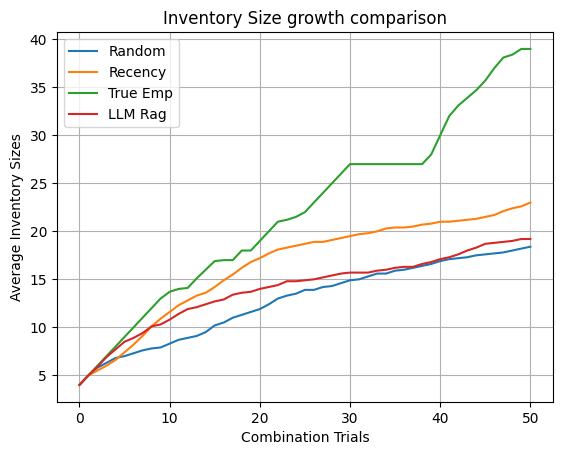

In [16]:
import matplotlib.pyplot as plt

x = range(len(rand))

# Plot each list with a label (automatically gets different colors)
plt.plot(x, rand, label='Random')
plt.plot(x, rec, label='Recency')
plt.plot(x, trueemp, label='True Emp')
plt.plot(x, llm_rag, label='LLM Rag')

# Add axis labels and title (optional)
plt.xlabel('Combination Trials')
plt.ylabel('Average Inventory Sizes')
plt.title('Inventory Size growth comparison')

# Add legend to identify lines
plt.legend()
plt.grid(True)
plt.show()